In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
housing = pd.read_csv('housing.csv')

In [ ]:
import sklearn.model_selection as ms
rn_train_set, rn_test_set = ms.train_test_split(housing, test_size = 0.2, random_state=42)  
income_categories = housing['median_income'] // 1.5
split = ms.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for training_indices, test_indices in split.split(housing, income_categories):
    stratified_train_set = housing.loc[training_indices]
    stratified_test_set = housing.loc[test_indices]
h = housing.groupby(income_categories).size() / len(housing)
h.name = 'housing'
rn_test = rn_test_set.groupby(income_categories).size() / len(rn_test_set)
rn_test.name = 'random test'

compare = pd.concat([h, str_test, rn_test], axis=1)
compare['stratified test %'] = 100 * (compare['stratified test'] - compare['housing']) / compare['housing']
compare['random test %'] = 100 * (compare['random test'] - compare['housing']) / compare['housing']
compare

ValueError: continuous is not supported

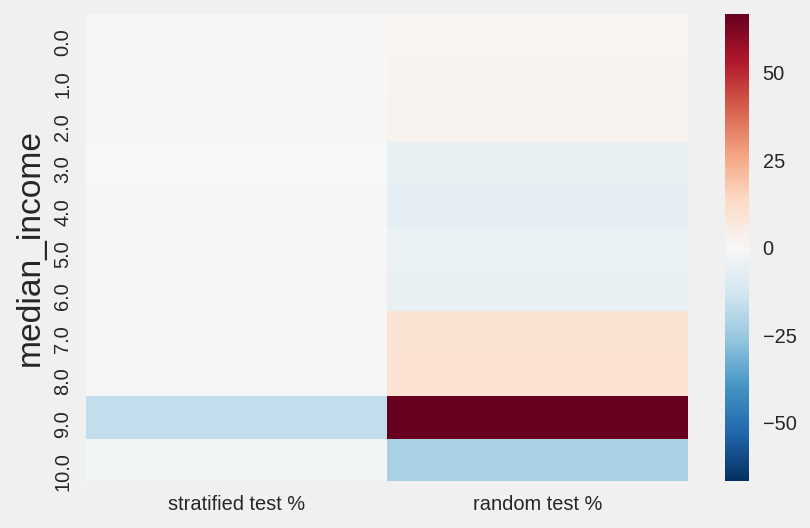

In [76]:
from sklearn.metrics import confusion_matrix
x=compare[['stratified test %','random test %']].as_matrix() 
a=sns.heatmap(compare[['stratified test %','random test %']],center=0)
confusion_matrix(x[:,0],x[:,1])